In [6]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

I start by loading and displaying the gray scale image


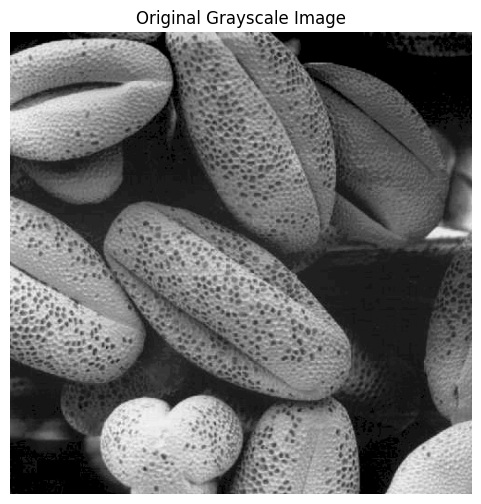

In [11]:
image_path = "/content/pollen.tif"
original_image = cv2.imread(image_path, cv2.IMREAD_GRAYSCALE)
plt.figure(figsize=(6,6))
plt.imshow(original_image, cmap="gray")
plt.title("Original Grayscale Image")
plt.axis("off")
plt.show()

I Apply log transform to original image and display the result.

In [13]:
c = 255 / np.log(1 + np.max(original_image))
# Compute the scaling factor "c"
# This ensures the transformed image re
log_transformed = c * np.log(1 + original_image.astype(np.float32))
# I then Converts pixel values to float for accurate calculations
# - Uses the logarithm function to enhance dark areas and compress bright ones
log_transformed = np.uint8(log_transformed)  # Convert back to uint8

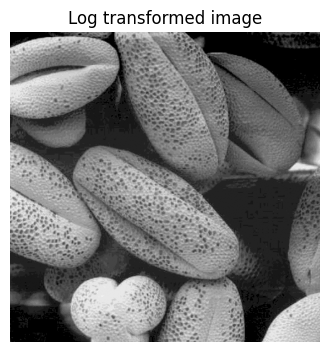

In [16]:
#here are the results
plt.figure(figsize=(4,5))
plt.imshow(log_transformed, cmap="gray")
plt.title("Log transformed image")
plt.axis("off")
plt.show()

next I apply inverse log transform to original image and display the result.

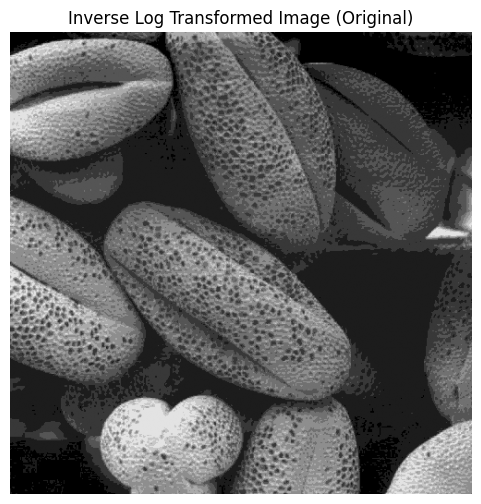

In [18]:
inverse_log_original = np.exp(original_image / c) - 1
inverse_log_original = np.uint8(inverse_log_original)
plt.figure(figsize=(6,6))
plt.imshow(inverse_log_original, cmap="gray")
plt.title("Inverse Log Transformed Image (Original)")
plt.axis("off")
plt.show()

I will apply log inverse transformation to image i took from the secodn stage


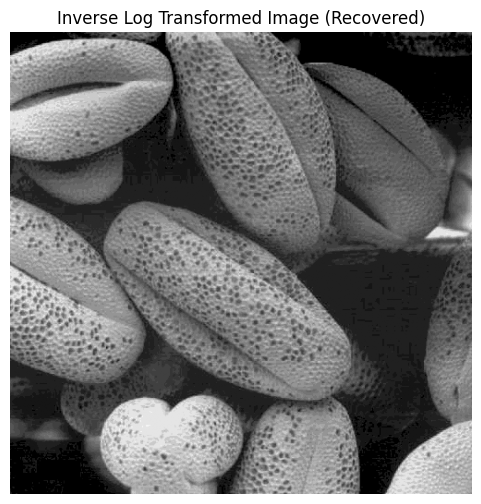

In [20]:
inverse_log_recovered = np.exp(log_transformed / c) - 1
inverse_log_recovered = np.uint8(inverse_log_recovered)
plt.figure(figsize=(6,6))
plt.imshow(inverse_log_recovered, cmap="gray")
plt.title("Inverse Log Transformed Image (Recovered)")
plt.axis("off")
plt.show()

log-transformed image increase dark regions will reducing bright areas

The inverse log transform applied directly to the original image does not restore fine details well. Which is quite strange to me cuz not that much fimiliar with it

Also The inverse log transform applied to the log-transformed image recovers the original image effectively

